In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 23 11:06:07 2024

@author: vbrunn
"""
#! pip install prodimopy
import import_ipynb
import GeneralFunctions as GF

#from prodimopy import read as pread
import prodimopy.read as pread
import prodimopy.plot as pplot


#%%
import numpy as np
#import matplotlib.pyplot as plt

importing Jupyter notebook from GeneralFunctions.ipynb


Matplotlib is building the font cache; this may take a moment.


In [39]:

def readDiscModel(DiscModelName):
    # This function reads a ProDiMo disc model from the specified directory
    # Read the ProDiMo disc model from the specified directory
    DiscModel = pread.read_prodimo(directory='ProDiMoModels/'+DiscModelName, name=None, readlineEstimates=True, readObs=True,
                                  readImages=True, filename="ProDiMo.out", filenameLineEstimates="FlineEstimates.out",
                                  filenameLineFlux="line_flux.out", td_fileIdx=None)
    
    # Return the read disc model
    return DiscModel



In [40]:


def ColumnDensityArray(DiscModel):
    """
    Calculate the column density array of the disc model.

    Parameters:
    - DiscModel: ProDiMo disc model object

    Returns:
    - ColumnDensityArray: 2D array of column densities
    """
    ColumnDensityArray = DiscModel.NHver
    return ColumnDensityArray

def FlippedColumnDensityArray(DiscModel):
    """
    Calculate the flipped column density array of the disc model.

    Parameters:
    - DiscModel: ProDiMo disc model object

    Returns:
    - FlippedColumnDensityArray: 2D array of flipped column densities
    """
    FlippedColumnDensityArray = np.flip(DiscModel.NHver, axis=1)
    return FlippedColumnDensityArray

def DensityHmoy(DiscModel):
    """
    Calculate the average hydrogen density of the disc model.

    Parameters:
    - DiscModel: ProDiMo disc model object

    Returns:
    - DensityHmoy: 2D Array of Total hydrogen nuclei density
    """
    DensityHmoy = DiscModel.nHtot
    return DensityHmoy

def DensityH2(DiscModel):
    """
    Calculate the hydrogen molecular density of the disc model.

    Parameters:
    - DiscModel: ProDiMo disc model object

    Returns:
    - DensityH2: 2DArray of Hydrogen molecular density
    """
    DensityH2 = DiscModel.getAbun('H2') * DiscModel.nHtot
    return DensityH2

def DensityH(DiscModel):
    """
    Calculate the atomic hydrogen density of the disc model.

    Parameters:
    - DiscModel: ProDiMo disc model object

    Returns:
    - DensityH: Array of Atomic hydrogen density
    """
    DensityH = DiscModel.getAbun('H') * DiscModel.nHtot
    return DensityH

def DensityHe(DiscModel):
    """
    Calculate the helium density of the disc model.

    Parameters:
    - DiscModel: ProDiMo disc model object

    Returns:
    - DensityHe: Array of Helium density
    """
    DensityHe = DiscModel.getAbun('He') * DiscModel.nHtot
    return DensityHe

def DensityE(DiscModel):
    """
    Calculate the electron density of the disc model.

    Parameters:
    - DiscModel: ProDiMo disc model object

    Returns:
    - DensityE: Array of Electron density
    """
    DensityE = DiscModel.getAbun('e-') * DiscModel.nHtot
    return DensityE

def DensityHplus(DiscModel):
    """
    Calculate the ionized hydrogen density of the disc model.

    Parameters:
    - DiscModel: ProDiMo disc model object

    Returns:
    - DensityHplus: Array of Ionized hydrogen density 
    """
    DensityHplus = DiscModel.getAbun('H+') * DiscModel.nHtot
    return DensityHplus

# Calculate the gas temperature of the disc model
def Temperature(DiscModel):
    GasTemperature = DiscModel.tg
    return GasTemperature

# Calculate the total density of the disc model
def DensityTot(DiscModel):
    DensityH2 = DiscModel.getAbun('H2')
    DensityH = DiscModel.getAbun('H')
    DensityHe = DiscModel.getAbun('He')
    DensityE = DiscModel.getAbun('e-')
    DensityTotl = (DensityH2 + DensityH + DensityHe + DensityHe+DensityE) * DiscModel.nHtot
    return DensityTotl

# Get the radial array of the disc model
def RArray(DiscModel):
    RArrayl = DiscModel.x
    return RArrayl

# Calculate the surface area array of the disc model
def SArray(DiscModel):
    Nx = len(DiscModel.x)
    Nz = len(DiscModel.z[0])
    Sarrayl = np.ones((Nx, Nz))
    ZArrayl = DiscModel.z
    for i in range(Nx):
        for j in range(Nz):
            Sarrayl[i, j] = (ZArrayl[i, Nz-1] - ZArrayl[i, Nz-1-j])
    return Sarrayl

# Calculate the difference of the column density array
def diffColumnDensityArray(DiscModel):  
    ColumnDensityArrayl = np.diff(np.flip(ColumnDensityArray(DiscModel), axis=1), axis=1)
    ColumnDensityArrayl = np.insert(ColumnDensityArrayl, 0, 0, axis=1)
    return ColumnDensityArrayl
    
# Calculate the difference of the surface area array
def diffSArray(DiscModel):
    Nx = len(DiscModel.x) 
    Nz = len(DiscModel.z[0]) 
    diffSArrayl = np.ones((Nx, Nz))
    SArrayl = SArray(DiscModel).copy()
    for i in range(Nx):
        for j in range(1, Nz):
            diffSArrayl[i, j] = SArrayl[i, j] - SArrayl[i, j - 1]
        diffSArrayl[i, 0] = 0
    return diffSArrayl



In [41]:

def VerticalPathIntegration(Function, DiscModel, i):
    # Calculate the vertical grid spacing array
    dz_array = diffSArray(DiscModel)[i] * GF.autocm 
    
    # Get the function values array
    f_array = Function(DiscModel)[i]
    
    # Reverse the array for integration from bottom to top
    f_array = f_array[::-1]
    
    # Initialize an empty list to store the integrated values
    Integlist = []
    
    # Initialize the integral variable
    Integral = 0
    
    # Perform the trapezoidal integration
    for j in range(len(f_array)-1):
        # Calculate the trapezoidal area between two points
        Integral += 0.5 * (f_array[j-1] + f_array[j]) * dz_array[j]
        
        # Append the integrated value to the list
        Integlist.append(Integral)
    
    # Convert the list to a numpy array and return
    return np.array(Integlist)




In [ ]:
def Relative_Density_H(DiscModel):
    # Calculate the relative atomic hydrogen density
    DensityH = DiscModel.getAbun('H') * DiscModel.nHtot
    DensityH2 = DiscModel.getAbun('H2') * DiscModel.nHtot
    DensityHe = DiscModel.getAbun('He') * DiscModel.nHtot
    DensityTot = DensityH + DensityH2 + DensityHe
    Relative_Density_H = DensityH / DensityTot
    return Relative_Density_H

def Relative_Density_H2(DiscModel):
    # Calculate the relative molecular hydrogen density
    DensityH = DiscModel.getAbun('H') * DiscModel.nHtot
    DensityH2 = DiscModel.getAbun('H2') * DiscModel.nHtot
    DensityHe = DiscModel.getAbun('He') * DiscModel.nHtot
    DensityTot = DensityH + DensityH2 + DensityHe
    Relative_Density_H2 = DensityH2 / DensityTot
    return Relative_Density_H2

def Relative_Density_He(DiscModel):
    # Calculate the relative helium density
    DensityH = DiscModel.getAbun('H') * DiscModel.nHtot
    DensityH2 = DiscModel.getAbun('H2') * DiscModel.nHtot
    DensityHe = DiscModel.getAbun('He') * DiscModel.nHtot
    DensityTot = DensityH + DensityH2 + DensityHe
    Relative_Density_He = DensityHe / DensityTot
    return Relative_Density_He


In [42]:

def fH2(DiscModel, i):
    """
    Calculate the fraction of hydrogen molecular density along the vertical path of the disc model.

    Parameters:
    - DiscModel: ProDiMo disc model object
    - i: Index of the vertical path

    Returns:
    - fH2: Array of the fraction of hydrogen molecular density
    """
    # Calculate the total column density along the vertical path
    N_array = VerticalPathIntegration(DensityTot, DiscModel, i)[1:]

    # Calculate the fraction of hydrogen molecular density
    fH2 = (1 / N_array) * VerticalPathIntegration(DensityH2, DiscModel, i)[1:]

    # Get the initial fraction of hydrogen molecular density
    i0 = DensityH2(DiscModel)[i][-1] / DensityTot(DiscModel)[i][-1]

    # Insert the initial fraction at the beginning of the array
    fH2 = np.insert(fH2, 0, i0)

    return fH2


def fH(DiscModel, i):
    """
    Calculate the fraction of atomic hydrogen density along the vertical path of the disc model.

    Parameters:
    - DiscModel: ProDiMo disc model object
    - i: Index of the vertical path

    Returns:
    - fH: Array of the fraction of atomic hydrogen density
    """
    # Calculate the total column density along the vertical path
    N_array = VerticalPathIntegration(DensityTot, DiscModel, i)[1:]

    # Calculate the fraction of atomic hydrogen density
    fH = (1 / N_array) * VerticalPathIntegration(DensityH, DiscModel, i)[1:]

    # Get the initial fraction of atomic hydrogen density
    i0 = DensityH(DiscModel)[i][-1] / DensityTot(DiscModel)[i][-1]

    # Insert the initial fraction at the beginning of the array
    fH = np.insert(fH, 0, i0)

    return fH


def fHe(DiscModel, i):
    """
    Calculate the fraction of helium density along the vertical path of the disc model.

    Parameters:
    - DiscModel: ProDiMo disc model object
    - i: Index of the vertical path

    Returns:
    - fHe: Array of the fraction of helium density
    """
    # Calculate the total column density along the vertical path
    N_array = VerticalPathIntegration(DensityTot, DiscModel, i)[1:]

    # Calculate the fraction of helium density
    fHe = (1 / N_array) * VerticalPathIntegration(DensityHe, DiscModel, i)[1:]

    # Get the initial fraction of helium density
    i0 = DensityHe(DiscModel)[i][-1] / DensityTot(DiscModel)[i][-1]

    # Insert the initial fraction at the beginning of the array
    fHe = np.insert(fHe, 0, i0)

    return fHe

def fHE(DiscModel, i):
    """
    Calculate the fraction of electron density along the vertical path of the disc model.

    Parameters:
    - DiscModel: ProDiMo disc model object
    - i: Index of the vertical path

    Returns:
    - fHE: Array of the fraction of electron density
    """
    # Calculate the total column density along the vertical path
    N_array = VerticalPathIntegration(DensityTot, DiscModel, i)[1:]
    
    # Calculate the fraction of electron density
    fHE = (1 / N_array) * VerticalPathIntegration(DensityE, DiscModel, i)[1:]
    
    # Get the initial fraction of electron density
    i0 = DensityE(DiscModel)[i][-1] / DensityTot(DiscModel)[i][-1]

    # Insert the initial fraction at the beginning of the array
    fHE = np.insert(fHE, 0, i0)
    #print(fHE[1])
    return fHE
#DiscModelPubName="ProDiMoModels/CIW98_XN_AH_CIK"
#DiscModelPub=readDiscModel(DiscModelPubName)
#print(fHE(DiscModelPub, 15))


READ: Reading File:  ProDiMoModels/CIW98_XN_AH_CIK/ProDiMo.out  ...
READ: Reading File:  ProDiMoModels/CIW98_XN_AH_CIK/Species.out  ...
READ: Reading File:  ProDiMoModels/CIW98_XN_AH_CIK/FlineEstimates.out  ...
READ: Reading File:  ProDiMoModels/CIW98_XN_AH_CIK/Elements.out  ...
READ: Reading File:  ProDiMoModels/CIW98_XN_AH_CIK/dust_opac.out  ...
READ: Reading File:  ProDiMoModels/CIW98_XN_AH_CIK/dust_sigmaa.out  ...
READ: Reading File:  ProDiMoModels/CIW98_XN_AH_CIK/StarSpectrum.out  ...
READ: Reading File:  ProDiMoModels/CIW98_XN_AH_CIK/gas_cs.out  ...
READ: Reading File:  ProDiMoModels/CIW98_XN_AH_CIK/line_flux.out  ...
READ: Reading File:  ProDiMoModels/CIW98_XN_AH_CIK/SED.out  ...
READ: Reading File:  ProDiMoModels/CIW98_XN_AH_CIK/SEDana.out  ...
READ: Reading File:  ProDiMoModels/CIW98_XN_AH_CIK/image.out  ...
READ: Reading File:  ProDiMoModels/CIW98_XN_AH_CIK/Parameter.out  ...
INFO: Reading time:  1.20 s
 
0.9999819042169289
[9.99981849e-01 9.99981904e-01 9.99981961e-01 9.9998

0.9999819042169289


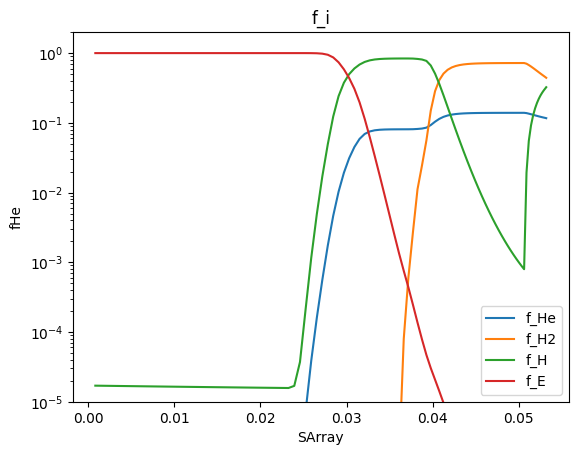

In [44]:
#Test Plot of fHe, fH2, fH
'''
import matplotlib.pyplot as plt

DiscModelPubName="ProDiMoModels/CIW98_XN_AH_CIK"
DiscModelPub=readDiscModel(DiscModelPubName)

x = SArray(DiscModelPub)[15][1:]
y = fHe(DiscModelPub, 15)
z = fH2(DiscModelPub, 15)
w = fH(DiscModelPub, 15)
v = fHE(DiscModelPub, 15)




plt.plot(x, y,label='f_He')
plt.plot(x, z,label='f_H2')
plt.plot(x, w,label='f_H')
plt.plot(x, v,label='f_E')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('SArray')
plt.ylabel('fHe')
plt.ylim(1e-5, 2)
plt.title('f_i')
plt.legend()
plt.show()
'''
